# Linear Relationships


One of the most basic things a researcher is interested in is seeing whether there is any relationship between variables. Here, we will look at data from Nettle (1998).


![](images/Nettle_1998_abstract.png)


Nettle recorded the *number of languages*, the *area* (in km<sup>2</sup>), the *population*, the *mean growing season* (MGS, in months), the number of weather stations measuring MGS, and the standard deviation of the measurements of MGS from the different weather stations in each country.

## Plotting Correlations
We can use seaborn to see if there is any clear relationship between these variables. We might expect that there would be a relationship between the area of a country and the population of that country. We can use the ``XXXXX`` and the ``XXXXX`` functions to take a quick look.


In [19]:
from os import chdir as cd
import pandas as pd

pathin = '/Users/ethan/Documents/GitHub/ethanweed.github.io/python-tutorials/data/'
file = 'nettle_1998.csv'

cd(pathin)

# make a pandas "dataframe" from the .csv file. The file uses semicolons to separate the columns.
df = pd.read_csv(file, sep = ';')

# Nettle reports the population data in 1000's, probably to save room in the data table, 
#but that is an unusual number to think about population in, so let's convert to millions. 
#While we're at it, let's convert km2 to millions, so that the number doesn't appear in scientific notation 
#on the x-axis
df['Population'] = df['Population']*1000/1000000
df['Area'] = df['Area']/1000000

# look at the first lines of the dataframe
df.head()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996
0,Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N
1,Angola,42,1.246700,10.303,50,6.22,1.87,N,N
2,Australia,234,7.713364,17.336,134,6.00,4.17,Y,N
3,Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N
4,Benin,52,0.112622,4.889,7,7.14,0.99,N,Y


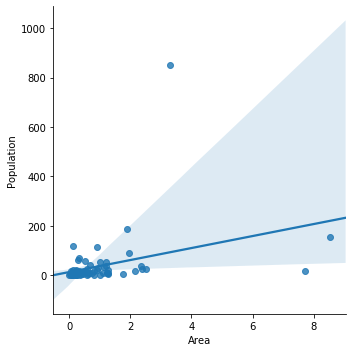

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

ax = sns.lmplot(x = "Area", y = "Population", data = df)

There does seem to be some sort of relationship here, but it is difficult to see on the plot. Three countries (India, Brazil, and Australia) are outliers, and they are pushing all the other data down into the lower-left corner. By transforming the data to a logarithmic scale, we can stretch them out a bit, and make them easier to see. Let's add two more columns to the dataframe, with log-transformed versions of the Population and Area data:

In [47]:
df['Population_log'] = np.log(df['Population'])
df['Area_log'] = np.log(df['Area'])
df.head()

,Country,Languages,Area,Population,Stations,MGS,GS_SD,Variable_GS,Used_in_1996,Population_log,Area_log
0,Algeria,18,2.381741,25.660,102,6.60,2.29,Y,N,3.244933,0.867832
1,Angola,42,1.246700,10.303,50,6.22,1.87,N,N,2.332435,0.220500
2,Australia,234,7.713364,17.336,134,6.00,4.17,Y,N,2.852785,2.042954
3,Bangladesh,37,0.143998,118.745,20,7.40,0.73,N,N,4.776978,-1.937956
4,Benin,52,0.112622,4.889,7,7.14,0.99,N,Y,1.586988,-2.183718


Now the relationship is a little easier to see:

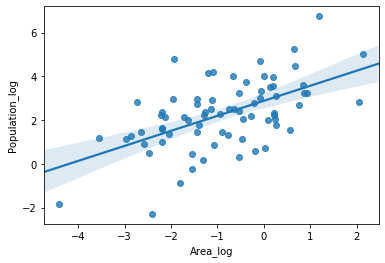

In [48]:
# Plot the log-transformed data
sns.regplot(x = "Area_log", y = "Population_log", data = df)

In [62]:
import scipy.stats as stats

# create a tuple "res" containing r and p-value for Pearson's correlation
res = stats.pearsonr(df['Area'], df['Population'])

# round of the output to 5 decimal places
print("R (correlation coefficient): ", round(res[0],5))
print("p-value: ", round(res[1],5))

R (correlation coefficient):  0.33308
p-value:  0.00373


The output tells us that there is a positive correlation between the number of languages and the area of the country. We can see this in the correlation coefficient (cor) which is 0.29. The correlation coefficient is a number between 1 and -1, with 1 indicating a perfect positive correlation, and -1 indicating a perfect negative correlation. The p-value of the correlation indicates how confident we can be in the fit of the model.